#### Принятие решений в бизнесе на основе данных
--------------------
<a id=return></a>

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import datetime as dt
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 8.27)})

import warnings
warnings.filterwarnings('ignore')


plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', None)


# для полного отображения содержимого столбцов
pd.set_option('display.max_colwidth', -1)

In [2]:
# импортируем данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Задание**
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**ICE = (Impact x Confidence) / Efforts**

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


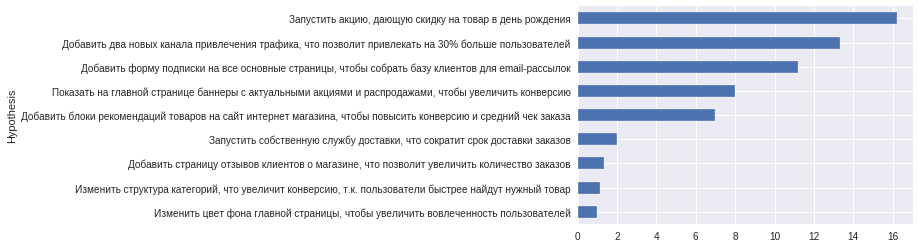

In [4]:
# Рассчитываем ICE
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts']
# Строим столбчатую диаграмму
(hypothesis
     .sort_values(by='ICE', ascending=True)
     .set_index('Hypothesis')['ICE']
     .plot(kind='barh')
);


**RICE = (Reach x Impact x Confidence) / Efforts**

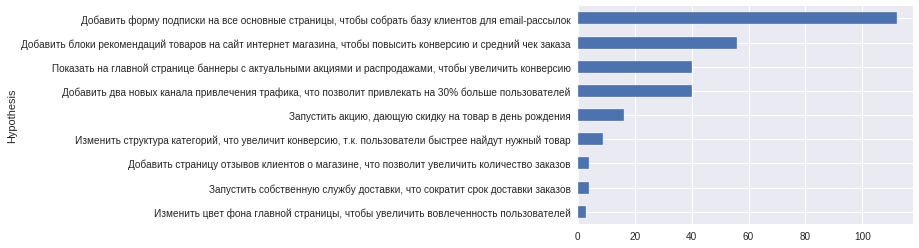

In [5]:
# Рассчитываем RICE
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts']
# Строим столбчатую диаграмму
(hypothesis
     .sort_values(by='RICE', ascending=True)
     .set_index('Hypothesis')['RICE']
     .plot(kind='barh')
);


>**Вывод**
 * Введение параметра **Reach** изменило приоритет гипотез по сравнению с данными по фреймворку **ICE**.
 * Так например, добавление формы подписки имеет бОльший охват, чем скидка именинникам.

**Проведем предобработку данных**
* Для начала посмотрим на данные в таблицах <code>orders</code>, <code>visitors</code>

In [6]:
def df_look(df):
    """
    Функция для получения общей информации о датафрейме
    """
    print('Первые 3 строки датафрейма')
    print('-'*52)
    print('{}'.format(df.head(3)))
    print('='*52)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('='*52)
    print('Типы данных и общая информация')
    print('-'*52)
    print(df.info())
    print('='*52)
    print('Наличие дубликатов')
    print('='*52)
    print(df.duplicated().sum())
    print('-'*52)
    print('Наличие пропусков')
    print('-'*52)
    print(df.isna().sum())
    print('='*52)

In [7]:
df_look(orders)

Первые 3 строки датафрейма
----------------------------------------------------
   transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
Размер датафрейма: (строк:столбцов) (1197, 5)
Типы данных и общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
Наличие дубликатов
0
----------------------------------------------------
Наличие пропусков
----------------------------------------------------
transactionId    0
visitorId        0
date             0
revenue        

In [8]:
df_look(visitors)

Первые 3 строки датафрейма
----------------------------------------------------
         date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
Размер датафрейма: (строк:столбцов) (62, 3)
Типы данных и общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
Наличие дубликатов
0
----------------------------------------------------
Наличие пропусков
----------------------------------------------------
date        0
group       0
visitors    0
dtype: int64


**Данные в порядке, кроме формата даты и названий столбцов в сamelCase**

In [9]:
def date_format(df, column):
    """функция для перевода даты в timestamp - тип"""
    df[column] = df[column].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
date_format(orders, 'date')
date_format(visitors, 'date')
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

> **Задания:**  
1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  
2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  
3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.  
4) Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.     
5) Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.  
  

In [11]:
orders_aggregated = (orders
                     # строим сводную таблицу группируя по дате и "группе теста (А или В)"
                     # находим количество уникальных транзакций и покупателей и сумму выручки
                     .pivot_table(index=['date', 'group'],
                                  aggfunc={'transaction_id':'nunique',
                                         'visitor_id':'nunique',
                                          'revenue':'sum'}
                                 )
                     # Сортируем по дате и группе
                     .sort_values(['date', 'group'])
                     # группируем по "группе теста" чтобы метод cumsum() 
                     # считал кумулятивные значения в группах А и В по отдельности
                     .groupby(['group'])
                     # применяем метод cumsum() для расчета кумулятивных показателей
                     .cumsum()
                    )

In [12]:
# тоже самое выполняем с таблицей visitors
visitors_aggregated = (visitors
                       .pivot_table(index=['date', 'group'],
                                   aggfunc={'visitors':'sum'}
                                   )
                       .sort_values(['date', 'group'])
                       .groupby(['group'])
                       .cumsum()
                      )

In [13]:
# выполним объединение методом join()
cummulative_grouped = (orders_aggregated
                       .join(visitors_aggregated[['visitors']])
                       # сбрасываем индексы
                       .reset_index()
                      )

In [14]:
cummulative_grouped.head(1) 

,date,group,revenue,transaction_id,visitor_id,visitors
0,2019-08-01,A,148579,24,20,719


In [15]:
cummulative_grouped = (cummulative_grouped
                       .rename(columns={
                           'transaction_id':'orders',
                           'visitor_id':'buyers'})   
                      )
cummulative_grouped.head()

,date,group,revenue,orders,buyers,visitors
0,2019-08-01,A,148579,24,20,719
1,2019-08-01,B,101217,21,20,713
2,2019-08-02,A,242401,44,39,1338
3,2019-08-02,B,266748,45,43,1294
4,2019-08-03,A,354874,68,63,1845


In [16]:
# добавляем столбцы для расчета среднего чека: "average_order_value"
# конверсии, и конверсии в процентах
cummulative_grouped['average_order_value'] = (cummulative_grouped['revenue'] / cummulative_grouped['orders']).round()
cummulative_grouped['conversion'] = cummulative_grouped['orders'] / cummulative_grouped['visitors']
cummulative_grouped['conversion, %'] = (cummulative_grouped['conversion']*100).round(2)
cummulative_grouped.head()

,date,group,revenue,orders,buyers,visitors,average_order_value,conversion,"conversion, %"
0,2019-08-01,A,148579,24,20,719,6191.0,0.033380,3.34
1,2019-08-01,B,101217,21,20,713,4820.0,0.029453,2.95
2,2019-08-02,A,242401,44,39,1338,5509.0,0.032885,3.29
3,2019-08-02,B,266748,45,43,1294,5928.0,0.034776,3.48
4,2019-08-03,A,354874,68,63,1845,5219.0,0.036856,3.69


In [17]:
# разделяем данные по группам теста
cummulative_group_A = cummulative_grouped.query('group=="A"')
cummulative_group_B = cummulative_grouped.query('group=="B"')

In [18]:
def metric_plot(df_A, df_B, metric, metric_name, relative=False):
    """
    Функция для построения графиков кумулятивных метрик
    принимает на вход: 
    1) датафреймы с кумулятивными метриками 
    для каждой группы теста "df_A", "df_B";
    2) метрику: "metric", может принимать значения:
             (average_order_value - "средний чек"),
             (conversion - "конверсия"),
             (revenue - "выручка");
    3) имя метрики metric_name - для подписи к графику
    4) параметр relative (по умолчанию False)
        Если False, то строятся графики по изменению метрик в группах A и В за период времени
        Если True, то строится график относительного изменения метрики в группе B относительно группы A.
    """
    if relative==False:
        plt.plot(df_A['date'], df_A[metric], label='A')
        plt.plot(df_B['date'], df_B[metric], label='B')
        plt.tick_params(axis ='x', rotation = 45)
        plt.title(f'Кумулятивная метрика: {metric_name}, по группам')
        plt.legend()
        plt.show()
    else:
        df_merged = (df_A[['date', metric]]
                     .merge(df_B[['date', metric]],\
                            left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
        plt.plot(df_merged['date'], (df_merged[metric+'B']/df_merged[metric+'A']-1))
        plt.tick_params(axis ='x', rotation = 45)
        plt.title(f'Относительное изменение кумулятивной метрики: {metric_name} группы B к группе A')
        plt.axhline(y=0, color='green', linestyle='dashdot')
        plt.show()

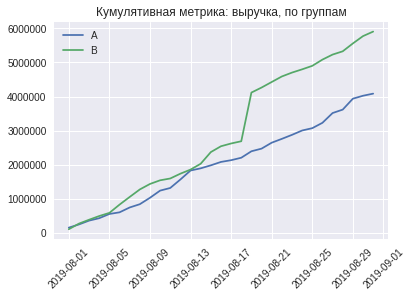

In [19]:
# кумулятивная выручка по группам
metric_plot(cummulative_group_A, cummulative_group_B, 'revenue', 'выручка', relative=False)

**Вывод**  
Кумулятивная выручка в группе B больше чем в A, при этом в В наблюдается резкий скачок, скорее всего повлиял какой-то очень дорогой заказ

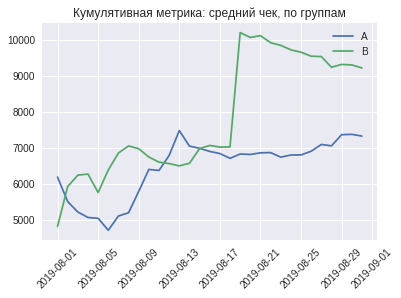

In [20]:
# кумулятивный средний чек по группам
metric_plot(cummulative_group_A, cummulative_group_B, 'average_order_value', 'средний чек', relative=False)

**Вывод**  
Скачок зафиксированный на графике кумулятивной выручки более ярко проявляется в кумулятивном среднем чеке, после чего появляется тендеция к снижению среднего чека


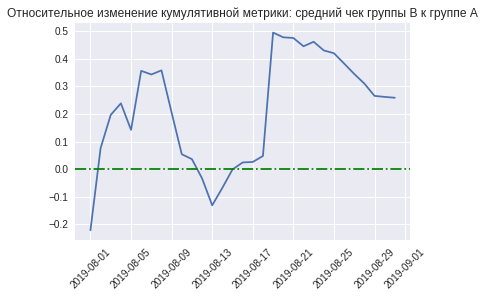

In [21]:
# относительное изменение кумулятивного среднего чека группы В к группе А
metric_plot(cummulative_group_A, cummulative_group_B, 'average_order_value', 'средний чек', relative=True)

**Вывод**  
Стабилизации и выхода на плато не наблюдается, нужно удалять выбросы

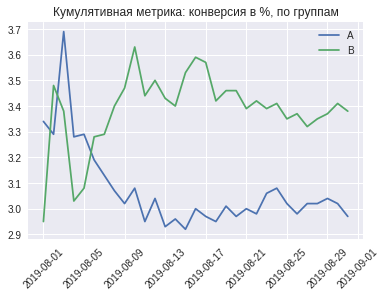

In [22]:
# кумулятивная конверсия по группам
metric_plot(cummulative_group_A, cummulative_group_B, 'conversion, %', 'конверсия в %', relative=False)

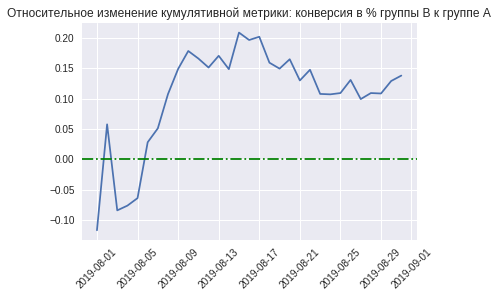

In [23]:
# относительное изменение кумулятивной конверсии группы В к группе А
metric_plot(cummulative_group_A, cummulative_group_B, 'conversion, %', 'конверсия в %', relative=True)

**Вывод**  
Наблюдается абсолютный и относительный прирост конверсии в группе B, но выхода на плато нет, нужно удалять выбросы.

> **Задание**  
6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  
7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных   пользователей.    
8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.    
9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.    

In [24]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [25]:
# Функция для расчета перцентилей и построения графиков 
def scatter_and_percentile(df, metric, low=None, high=None):
    '''
    Функция принимает на вход датафрейм и необходимую метрику:
        1) transaction_id - идентификатор покупки 
           (при предварительной группировке и подсчете уникальных transaction_id 
            будет рассчитано количество заказов на пользователя)
        2) revenue - выручка
        3) параметры low и high применяются для масштабирования графика по оси Y
           (по умолчанию None)
        4) Рассчитываются и выводятся 95-й и 99-й перцентили
    '''
    sns.set(rc={'figure.figsize':(10, 7)})
    x_values = pd.Series(range(0, len(df)))
    plt.scatter(x_values, df[metric], alpha=0.4)
    plt.ylim(low, high)
    if metric=='transaction_id':
        plt.title('Количество заказов на пользователя')
    else:
        plt.title('Стоимость заказов')
    plt.show()
    percentile = np.percentile(df[metric], [90, 95, 99])
    print(f'95 перцентиль = {percentile[1].round(1)}\n99 перцентиль = {percentile[2].round()}')

In [26]:
# Предварительная группировка данных о заказах
df_orders = (orders
             .groupby('visitor_id', as_index=False)
             .agg({'transaction_id':'nunique'})
             .sort_values(by='transaction_id', ascending=False)
            )

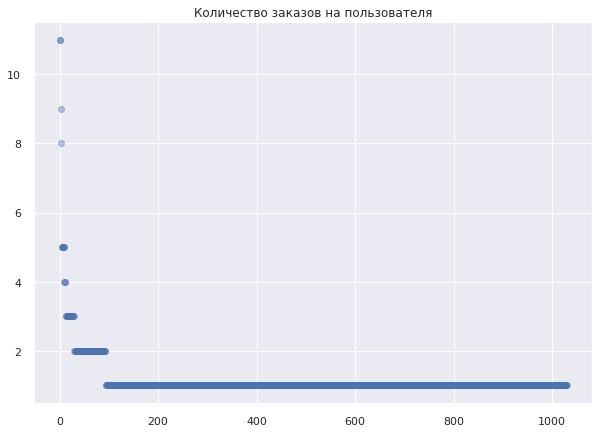

95 перцентиль = 2.0
99 перцентиль = 4.0


In [27]:
scatter_and_percentile(df_orders, 'transaction_id')

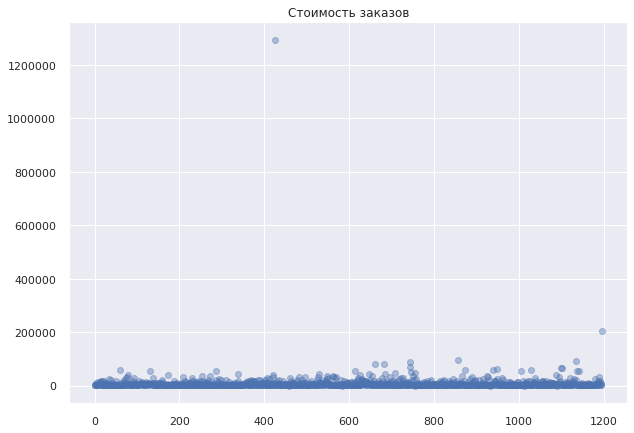

95 перцентиль = 28000.0
99 перцентиль = 58233.0


In [28]:
scatter_and_percentile(orders,'revenue')

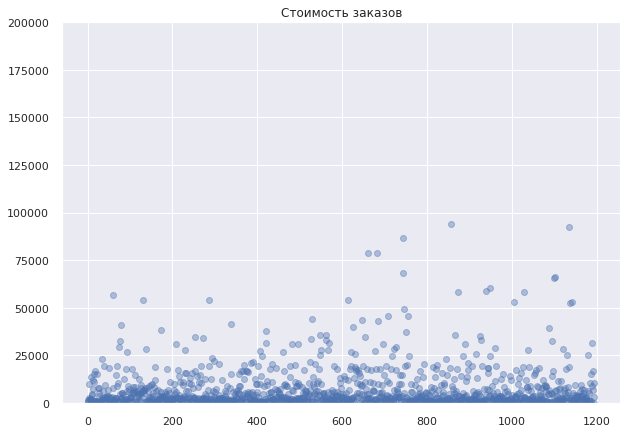

95 перцентиль = 28000.0
99 перцентиль = 58233.0


In [29]:
# Изменим лимиты по оси Y, выставим параметр high=200000 
scatter_and_percentile(orders,'revenue', 0, 200000)

**Количество заказов (граница аномальных пользователей)**:
* Выберем 95-й перцентиль в качестве границы числа аномальных заказов
  (т.е удалим тех кто сделал более 2-х заказов) и
  сохраним оставшихся в новом датафрейме  

 **Выручка (граница аномальной стоимости заказов)**:
* Также выберем 95-й перцентиль в качестве границы аномального значения выручки (удалим заказы дороже 28 000 у.е) 

**Задание**
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Проведем группировку аналогичную тому что сделали в начале, только не будем рассчитывать кумулятивные показатели**

In [30]:
orders_initial = (orders
                     # строим сводную таблицу группируя по дате и "группе теста (А или В)"
                     # находим количество уникальных транзакций и покупателей и сумму выручки
                     .pivot_table(index=['date', 'group'],
                                  aggfunc={'transaction_id':'nunique',
                                         'visitor_id':'nunique',
                                          'revenue':'sum'}
                                 )
                     # Сортируем по дате и группе
                     .sort_values(['date', 'group'])
                    )

In [31]:
# тоже самое выполняем с таблицей visitors
visitors_initial = (visitors
                       .pivot_table(index=['date', 'group'],
                                   aggfunc={'visitors':'sum'}
                                   )
                       .sort_values(['date', 'group'])
                      )

In [32]:
# выполним объединение методом join()
df_grouped = (orders_initial
              .join(visitors_initial[['visitors']])
              # сбрасываем индексы
              #.reset_index()
             )

In [33]:
df_grouped = (df_grouped
              .rename(columns={
                  'transaction_id':'orders_daily',
                  'visitor_id':'buyers_daily',
                  'revenue':'revenue_daily'}
                     ))

In [34]:
df_grouped.head()

revenue_daily  orders_daily  buyers_daily  visitors
date       group                                                     
2019-08-01 A      148579         24            20            719     
           B      101217         21            20            713     
2019-08-02 A      93822          20            19            619     
           B      165531         24            23            581     
2019-08-03 A      112473         24            24            507

In [35]:
df_orders.head()

,visitor_id,transaction_id
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


In [36]:
df_orders.shape[0]

1031

In [37]:
orders.shape[0]

1197

In [38]:
# Объединяем датафреймы
df_orders = (df_orders
             .rename(columns={'transaction_id':'transactions_per_buyer'})
             .set_index('visitor_id'))

df_combined = (orders
               .rename(columns={'revenue':'revenue_per_buyer'})
               .set_index('visitor_id')
              )

In [39]:
df_combined = (df_combined
               .merge(df_orders, on='visitor_id', how='left')
               .reset_index()
               .set_index(['date','group'])
               .merge(df_grouped, on=['date', 'group'], how='left')
               .reset_index()
              )

In [40]:
df_combined.head()

,date,group,visitor_id,transaction_id,revenue_per_buyer,transactions_per_buyer,revenue_daily,orders_daily,buyers_daily,visitors
0,2019-08-15,B,3312258926,3667963787,1650,1,342499,31,31,544
1,2019-08-15,B,3642806036,2804400009,730,1,342499,31,31,544
2,2019-08-15,A,4069496402,2961555356,400,2,88205,15,15,628
3,2019-08-15,B,1196621759,3797467345,9759,1,342499,31,31,544
4,2019-08-15,B,2322279887,2282983706,2308,1,342499,31,31,544


In [41]:
# проверим на одном пользователе, у которого 9 заказов
df_combined.query('visitor_id==2378935119')

,date,group,visitor_id,transaction_id,revenue_per_buyer,transactions_per_buyer,revenue_daily,orders_daily,buyers_daily,visitors
33,2019-08-15,A,2378935119,486237576,1650,9,88205,15,15,628
118,2019-08-22,A,2378935119,4233533907,3390,9,112741,16,16,609
179,2019-08-17,A,2378935119,1784270968,310,9,50861,10,9,412
391,2019-08-25,B,2378935119,2213813903,21220,9,102862,14,14,679
435,2019-08-28,B,2378935119,2430683444,20450,9,96008,28,27,654
473,2019-08-28,B,2378935119,3224706027,4410,9,96008,28,27,654
697,2019-08-09,B,2378935119,1612868255,30649,9,160812,25,24,610
1029,2019-08-10,A,2378935119,469609643,58220,9,210495,16,16,406
1031,2019-08-10,B,2378935119,1661772358,2640,9,107802,23,23,369


Объединение прошло успешно

In [42]:
# добавим 2 колонки (расчет среднего чека и расчет конверсии)
df_combined['average_order_value'] = (df_combined['revenue_daily'] / df_combined['orders_daily']).round()
df_combined['conversion'] = df_combined['orders_daily'] / df_combined['visitors']

In [43]:
#  из датафрейма df_combined сохраним 4 столбца в датафрейм df_combined_raw
# 'group', 'revenue_per_buyer' и 'transactions_per_buyer' для фильтрации данных
# 'average_order_value' и 'conversion' - интересующие нас метрики
df_combined_raw = df_combined[['group','revenue_per_buyer','transactions_per_buyer','average_order_value', 'conversion']]
df_combined_raw.head()

,group,revenue_per_buyer,transactions_per_buyer,average_order_value,conversion
0,B,1650,1,11048.0,0.056985
1,B,730,1,11048.0,0.056985
2,A,400,2,5880.0,0.023885
3,B,9759,1,11048.0,0.056985
4,B,2308,1,11048.0,0.056985


In [44]:
df_combined_cleaned = df_combined_raw.query('transactions_per_buyer <=2 and revenue_per_buyer <= 28000')

print(f'Удалено: {df_combined_raw.shape[0]-df_combined_cleaned.shape[0]} строк')

Удалено: 186 строк


----------------------
>Посмотрим на количество пользователей в группах **А** и **В**
<a id=user_amount></a>
----------------------

In [45]:
visitors_A = visitors.query('group == "A"')['visitors'].sum()
visitors_B = visitors.query('group == "B"')['visitors'].sum()

In [46]:
print('Количество посетителей в группе А =', visitors_A)
print('Количество посетителей в группе В =', visitors_B)
print(41*"-")
relative_difference = ((abs(1-(visitors_A/visitors_B)))*100).round(2)
print(f'Относительное различие  {relative_difference} %')

Количество посетителей в группе А = 18736
Количество посетителей в группе В = 18916
-----------------------------------------
Относительное различие  0.95 %


**Различие в количестве пользователей в обеих группах не превышает 1 %, т.е инструмент деления трафика сработал корректно**

**Средний чек по сырым данным**
<a id=revenue></a>

In [47]:
def mw_test(sample_A, sample_B):
    alpha=0.05
    results = st.mannwhitneyu(sample_A, sample_B)
    pvalue = results.pvalue.round(5)
    print('p-value =', pvalue)
    if pvalue < alpha:
        print('Отвергаем нулевую гипотезу, группы имеют статистически значимое различие')
    else:
        print('Не удалось отвергнуть нулевую гипотезу, группы не имеют статистически значимого различия')
    
    print(f'Изменение метрики в группе B относительно группы А: {(( (sample_B.mean()/sample_A.mean()) -1 )*100).round(3)} %')

In [48]:
mw_test((df_combined_raw.query('group=="A"')['revenue_per_buyer']),\
        (df_combined_raw.query('group=="B"')['revenue_per_buyer']))

p-value = 0.36465
Не удалось отвергнуть нулевую гипотезу, группы не имеют статистически значимого различия
Изменение метрики в группе B относительно группы А: 25.871 %


**UPD:** <font color='green'>**Используем revenue_per_buyer**</font>

**Средний чек по очищенным данным**

In [49]:
mw_test((df_combined_cleaned.query('group=="A"')['revenue_per_buyer']),\
        (df_combined_cleaned.query('group=="B"')['revenue_per_buyer']))

p-value = 0.34536
Не удалось отвергнуть нулевую гипотезу, группы не имеют статистически значимого различия
Изменение метрики в группе B относительно группы А: -2.71 %


**Вывод**  
* В группе **В** по сырым данным относительный прирост среднего чека почти 30 %, но разница не является статистически значимой  
* В случае очищенных данных средний чек в группе **В** меньше чем в группе **А** на 2,71 %, группы также не имеют статистически  значимого различия.
* **Итог:**  
* Удаление дорогих заказов, искажающих картину показывает, что средний чек в группе B на 2,71 % меньше чем в группе А, а не больше на 30 % как было по сырым данным.
* Однако,  как по сырым, так и по отфильтрованным данным различия не являются статистически значимыми

**Конверсия по сырым и очищенным данным**

In [50]:
mw_test((df_combined_raw.query('group=="A"')['conversion']),\
        (df_combined_raw.query('group=="B"')['conversion']))

p-value = 0.0
Отвергаем нулевую гипотезу, группы имеют статистически значимое различие
Изменение метрики в группе B относительно группы А: 14.288 %


In [51]:
mw_test((df_combined_cleaned.query('group=="A"')['conversion']),\
        (df_combined_cleaned.query('group=="B"')['conversion']))

p-value = 0.0
Отвергаем нулевую гипотезу, группы имеют статистически значимое различие
Изменение метрики в группе B относительно группы А: 12.914 %


**Вывод**  
Конверсия в группе В демонстрирует относительный прирост в 13 %

**Оценка размера необходимой выборки**  
с помощью калькулятора:
https://www.evanmiller.org/ab-testing/sample-size.html
была проведена оценка необходимого размера выборки 
при следующих параметрах:
* Baseline conversion rate = 3 %
* Minimum Detectable Effect = 14 %
* Relative
* мощность 80 %
* значимость 5 %
Необходимый размер выборки составил 30593 пользователей на группу  
**Ссылка на скриншот:**  
https://yadi.sk/i/w7eVwpN6M6wnQA


#### Общий вывод:
<a id=conclusion></a>
    

* Различия в среднем чеке между группами не являются статистически значимыми
* Различия в конверсии между группами статистически значимы, конверсия в группе B больше на 13 % чем в группе A.

> Расчетное количество размера выборки составляет 30593 пользователя на группу, при этом:  
Количество посетителей в группе А = 18736  
Количество посетителей в группе В = 18916  
* Графическое отображение метрик также показывает, что метрики не вышло на плато, поэтому **рекомендуется продолжить тест**, дождаться выхода на плато в графиках и делать дальнейшие выводы, иначе можно "попасть" в "проблему подглядывания"

* **Рекомендуется продолжить тест**


[Вернуться в начало](#return)